In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
import time
from random import sample
from os import listdir

In [2]:
data=pd.read_csv('E:/catalogues/asued.tsv', sep='|', skiprows=52)
#ra,dec,size=data['RAJ2000'],data['DEJ2000'],max(data['MajDiam'])

In [3]:
unclear=[]
def clearing(element,character='?'):                #define function to remove rows with uncertain SNR type
        if character in str(element):
            return False
        else:
            return True
cleareddata=data[data.iloc[:,6].apply(lambda x:clearing(x))]
cleareddata.reset_index(drop=True)                #remove old index

,SNR,RAJ2000,DEJ2000,MajDiam,MinDiam,u_MinDiam,type,l_S(1GHz),S(1GHz),u_S(1GHz),Sp-Index,u_Sp-Index,Names,Simbad
0,G000.0+00.0,17 45 44,-29 00,3.5,2.5,,S,,100.0,?,0.80,?,Sgr A East,Simbad
1,G000.3+00.0,17 46 15,-28 38,15.0,8.0,,S,,22.0,,0.60,,,Simbad
2,G000.9+00.1,17 47 21,-28 09,8.0,,,C,,18.0,?,,v,,Simbad
3,G001.0-00.1,17 48 30,-28 09,8.0,,,S,,15.0,,0.60,?,,Simbad
4,G001.4-00.1,17 49 39,-27 46,10.0,,,S,,2.0,?,,?,,Simbad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,G358.1+01.0,17 37 00,-29 59,20.0,,,S,,2.0,?,,?,,Simbad
226,G358.5-00.9,17 46 10,-30 40,17.0,,,S,,4.0,?,,?,,Simbad
227,G359.0-00.9,17 46 50,-30 16,23.0,,,S,,23.0,,0.50,,,Simbad
228,G359.1-00.5,17 45 30,-29 57,24.0,,,S,,14.0,,0.40,?,,Simbad


In [647]:
cleareddata['MinDiam']=cleareddata['MinDiam'].apply(lambda x: float(x) if len(x.strip())!=0 else 0)

<ipython-input-647-b22fb160b65c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleareddata['MinDiam']=cleareddata['MinDiam'].apply(lambda x: float(x) if len(x.strip())!=0 else 0)


In [648]:
size=25            #max size in arcmin
testdata=cleareddata[(cleareddata.MinDiam<size)|(cleareddata.MajDiam<size)]

In [649]:
testdata['cut']=testdata.apply(lambda x: max(x['MinDiam'],x['MajDiam']),axis=1)
ra,dec,cut=testdata['RAJ2000'],testdata['DEJ2000'],testdata['cut']

<ipython-input-649-5fd4abc3114c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdata['cut']=testdata.apply(lambda x: max(x['MinDiam'],x['MajDiam']),axis=1)


In [650]:
testdata.reset_index(drop=True)
query=[i+' '+j for i,j in zip(list(ra),list(dec))]
cut=list(cut)

In [652]:
len(query)

197

In [679]:
driver=webdriver.Firefox()
driver.get('https://third.ucllnl.org/cgi-bin/gpscutout')
script='arguments[0].value=arguments[1]'

In [680]:
tgss=[]
j=0
for i in range(len(query)):
    try:
        RA=driver.find_element_by_name('RA')
        Cut=driver.find_element_by_name('ImageSize')
        driver.execute_script(script, RA,'{}'.format(query[i]))
        driver.execute_script(script,Cut,'{}'.format(cut[i]))
        
        exg=driver.find_element_by_name('Equinox')
        driver.execute_script(script,exg,'{}'.format('J2000'))
        
        download=driver.find_elements_by_name('ImageType')[2]
        download.click()

        submit=driver.find_element_by_name('.submit')
        submit.click()
    except NoSuchElementException:
        print('missing file with ra,dec: {}'.format(query[i]))
        tgss.append(query[i])
        driver.get('https://third.ucllnl.org/cgi-bin/gpscutout')
        j+=1
        continue
print('missing files percentage: '+ str((round(100*j*len(query)**-1,2))) +'%')        

missing file with ra,dec: 17 46 15 -28 38
missing file with ra,dec: 17 48 30 -28 09
missing file with ra,dec: 17 48 45 -27 10
missing file with ra,dec: 18 08 55 -27 03
missing file with ra,dec: 17 33 25 -21 34
missing file with ra,dec: 17 57 04 -24 00
missing file with ra,dec: 17 57 29 -23 25
missing file with ra,dec: 18 02 11 -23 34
missing file with ra,dec: 18 04 34 -21 49
missing file with ra,dec: 18 03 58 -21 03
missing file with ra,dec: 18 12 46 -19 38
missing file with ra,dec: 18 22 38 -14 55
missing file with ra,dec: 18 23 08 -13 46
missing file with ra,dec: 18 24 34 -13 11
missing file with ra,dec: 18 33 40 -10 25
missing file with ra,dec: 19 06 40 +04 28
missing file with ra,dec: 19 33 20 +18 56
missing file with ra,dec: 19 21 20 +21 44
missing file with ra,dec: 19 47 52 +27 45
missing file with ra,dec: 19 54 32 +31 29
missing file with ra,dec: 20 16 02 +37 12
missing file with ra,dec: 20 20 50 +40 26
missing file with ra,dec: 20 53 20 +43 27
missing file with ra,dec: 20 58 40

In [10]:
print('missing files percentage: '+ str((round(100*j*len(query)**-1,2))) +'%')

NameError: name 'j' is not defined

In [108]:
direc='E:/gps20new/'
testlist=listdir(direc)
print(testlist)

['G10.875000+0.087500.fits', 'G11.163900-0.716700.fits', 'G11.200000+0.116700.fits', 'G11.550000+0.333300.fits', 'G11.890300-0.225000.fits', 'G12.820800-0.020800.fits', 'G12.913900-0.280600.fits', 'G13.187500+0.038900.fits', 'G16.358300-0.183300.fits', 'G17.336100-0.138900.fits', 'G18.150000-0.172200.fits', 'G18.253600-0.308300.fits', 'G18.637500-0.291700.fits', 'G18.758300-0.073600.fits', 'G19.461100+0.144400.fits', 'G19.580000-0.240000.fits', 'G19.591700+0.025000.fits', 'G19.610000-0.120000.fits', 'G19.660000-0.220000.fits', 'G20.466700+0.150000.fits', 'G21.556900-0.102800.fits', 'G21.641700+0.000000.fits', 'G22.383300+0.100000.fits', 'G22.758300-0.491700.fits', 'G22.991700-0.358300.fits', 'G23.566700-0.033300.fits', 'G24.180300+0.216700.fits', 'G25.222200+0.291700.fits', 'G27.133300+0.033300.fits', 'G28.375000+0.202800.fits', 'G28.516700+0.133300.fits', 'G28.558300-0.008300.fits', 'G28.766700-0.425000.fits', 'G29.066700-0.675000.fits', 'G29.077800+0.454200.fits', 'G29.366700+0.10000

In [2]:
from astropy.io import fits
import matplotlib.colors as colors

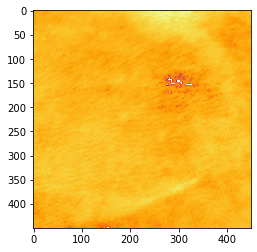

In [560]:
a=850#logarithmic scaling for a better plot, scale 'a' till sources are visible
#logged=np.log10(a*fits.getdata(lis[1])+1)/np.log10(a)
plt.imshow(fits.getdata(lis[1]),cmap='inferno',norm=colors.LogNorm())

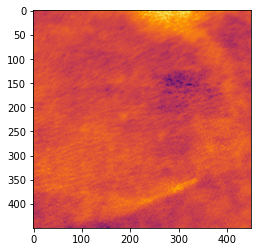

In [561]:
a=500#logarithmic scaling for a better plot, scale 'a' till sources are visible
logged=np.log10(a*fits.getdata(lis[1])+1)/np.log10(a)
plt.imshow(logged,cmap='inferno')

In [10]:
from astropy import stats

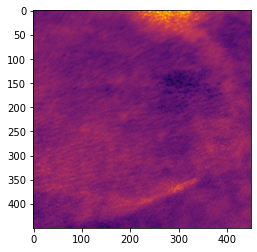

In [564]:
plt.imshow(tryout,cmap='inferno')
plt.imshow(fits.getdata(lis[1]),cmap='inferno')

In [109]:
def key1(x):
    if x[0]=='G':
        return x.split('.')[0].strip('G')
    else:
        return x.split('J')[1].split('-')[0].split('+')[0]
def key2(x):
    return x.split('.')[1][:6]
keys=lambda x:(int(key1(x)),key2(x))
y=sorted(testlist,key=keys)

In [110]:
y

['G6.450000-0.558300.fits',
 'G6.537500-0.602800.fits',
 'G7.216700+0.183300.fits',
 'G8.308300-0.086100.fits',
 'G8.858300-0.258300.fits',
 'G9.683300-0.066700.fits',
 'G10.875000+0.087500.fits',
 'G11.163900-0.716700.fits',
 'G11.200000+0.116700.fits',
 'G11.550000+0.333300.fits',
 'G11.890300-0.225000.fits',
 'G12.820800-0.020800.fits',
 'G12.913900-0.280600.fits',
 'G13.187500+0.038900.fits',
 'G16.358300-0.183300.fits',
 'G17.336100-0.138900.fits',
 'G18.150000-0.172200.fits',
 'G18.253600-0.308300.fits',
 'G18.637500-0.291700.fits',
 'G18.758300-0.073600.fits',
 'G19.461100+0.144400.fits',
 'G19.580000-0.240000.fits',
 'G19.591700+0.025000.fits',
 'G19.610000-0.120000.fits',
 'G19.660000-0.220000.fits',
 'G20.466700+0.150000.fits',
 'G21.556900-0.102800.fits',
 'G21.641700+0.000000.fits',
 'G22.383300+0.100000.fits',
 'G22.758300-0.491700.fits',
 'G22.991700-0.358300.fits',
 'G23.566700-0.033300.fits',
 'G24.180300+0.216700.fits',
 'G25.222200+0.291700.fits',
 'G27.133300+0.03330

In [116]:
#first set, folder gps20new G* from helfand, white 2007 catalog J* from Green
bad1=[1,2,3,4,5,7,9,10,19,14,24,25,26,27,28,32,35,36,38,39,42,46,49,50,51,52,60,62,64,65,68,69]
goodsigma2=[6,12,17,18,22,29,33,43,44,45,48,58,66,67]
goodsigma1=[0,10,11,15,16,34,41,47,53,56]
goodsigma_5=[8,23,31,55,57,61]
goodsigma3=[13,37,40,59]
goodlog800=[20]
goodlog50=[30]
goodlog600=[21]
goodlogged200sigma1=[54,63]
#second set, missing folder extras from Green
bad2=[0,1,2,3,4,6,7,10,14,15,16]
goodsigma2=[12]
goodsigma1=[8,9,13]
goodsigma_5=[5,11]
#pointsources
good3=[2,6,7,8,11,15,40,46,47,49,50,53,57,59,60,61,64,67,68,69]
sigma=1
x=y[10]
tryout=fits.getdata(direc+x)

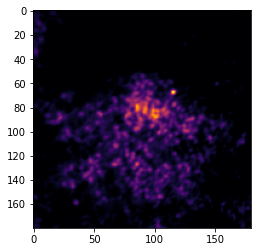

In [117]:
_, median, std = stats.sigma_clipped_stats(tryout, sigma=sigma)
tryout[tryout<median+sigma*std]=median+sigma*std
plt.imshow(tryout,cmap='inferno')

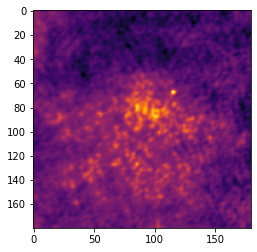

In [113]:
a=200#logarithmic scaling for a better plot, scale 'a' till sources are visible
logged=np.log10(a*fits.getdata(direc+x)+1)/np.log10(a)
logged[logged<median+sigma*std]=median+sigma*std
plt.imshow(logged,cmap='inferno')

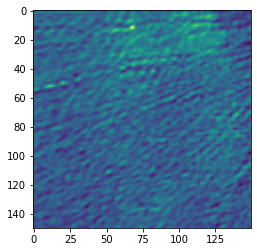

In [634]:
plt.imshow(fits.getdata(direc+x,cmap='inferno'))